<h1> Sistema de Detección de Ciberataques DDoS por Análisis de Tráfico de Red </h1>
<h2> Master en IA sobre el sector de la Energía y las infraestructuras </h2><br>

<h4><b>Autor: </b> Ramiro Bueno Martínez</h4> 
<h4><b>Fecha: </b> 11/08/2025</h4> 
<h4><b>Version: </b> R200</h4>
<h4><b>Descripcion: </b> Parte V: Identificación de Patrones y Fases de Ataque </h4>

<h1> Dataset </h1>
Conjunto de Datos relativo a la documentación de un Ataque de Denegación Distribuida de Servicio (DDoS), realizado a partir del conjunto de datos publicado por el Instituto de Ciber Seguridad Canadiense (CIC) el año 2019.

<h3> Licencia: </h3>

Segun la información proporcionada por el Instituto Canadiense de Ciberseguridad es posible redistribuir,
volver a publicar y reflejar el conjunto de datos CICDDoS2019 en cualquier forma.
https://www.unb.ca/cic/datasets/ddos-2019.html
Sin embargo, cualquier uso o redistribución de los datos debe incluir una cita al conjunto de datos CICDDoS2019 y el artículo publicado relacionado. Un trabajo de investigación en el que se esbozan los detalles de analizar el conjunto de datos IDS/IPS similar y principios relacionados:

- Iman Sharafaldin, Arash Habibi Lashkari, Saqib Hakak y Ali A. Ghorbani, ” Developing Realistic Distributed Denial of Service of Service (DDoS) Attack Dataset and Taxonomy “, IEEE 53rd International Carnahan Conference on Security Technology, Chennai, India, 2019. DOI: 10.1109/CCST.2019.8888419

<h1> Resumen </h1>

El presente cuaderno proporciona soporte a la comparativa desarrollada en el TFM centrado en el desarrollo de Sistemas de Detección y Mitigación de Amenazas para Smart Grids (SG) utilizando tecnologías avanzadas basadas en Inteligencia Artificial (IA). Desde técnicas de Aprendizaje Automático (ML) hasta soluciones basadas en la utilización de Metaheurísticas o Sistemas Autónomos y Multiagente (MAS), se exploran diferentes métodos estableciendo comparativas, que permitan identificar los métodos que ofrecen mejores prestaciones en la detección de anomalías en el tráfico de red.

## Objetivos

En el presente cuaderno, se pretende desplegar técnicas basadas en minería de datos, con el objetivo de identificar posibles patrones de ataque a través de diferentes fases del ataque, a partir de los datos del conjunto de datos CICDDoS2019. Como se podrá obserbar no son resultados concluyentes puesto que se intentará explorar y validar algunas hipótesis, en fases previas al ataque que no estan documentadas con tráfico de red, sin embargo nos servirán para realizar un recorrido a través de distintas herramientas y librerías de python, que nos permiten una exploración mas en profundidad e conjuntos de datos, y una visualización de los resultados, por ejemplo a través de Diagramas de Sankey.

In [1]:
import os
#from google.colab import drive

# Montar Google Drive si aún no está montado
#try:
#    drive.mount('/content/drive')
#except:
#    print("Drive ya está montado.")

# Ficheros del Conjunto de datos ASDDoS2024
_asddos_dataset_paths = [
    'C:/DataSets/asddos2024/Training/Training_Exp_Attack_TCP.csv',
    'C:/DataSets/asddos2024/Training/Training_Exp_Attack_UDP.csv',
    'C:/DataSets/asddos2024/Training/Training_Ref_Attack_MIXED.csv',
    'C:/DataSets/asddos2024/Training/Training_Ref_Attack_TCP.csv',
    'C:/DataSets/asddos2024/Training/Training_Ref_Attack_UDP.csv'
]

# Verificar la existencia de cada archivo
print("--- [IMPORTANTE] Verificando la existencia de los archivos ---")
all_files_exist = True
for file_path in _asddos_dataset_paths:
    if os.path.exists(file_path):
        print(f"El archivo existe: {file_path}")
    else:
        print(f"El archivo NO existe: {file_path}")
        all_files_exist = False

# Resumen
if all_files_exist:
    print("\n [CORRECTO] EL CONJUNTO DE DATOS ASDDOS-2019 ESTA DISPONIBLE")
else:
    print("\n [ERROR] EL CONJUNTO DE DATOS ASDDOS-2019 NO ESTA DISPONIBLE EN SU TOTALIDAD")

# Verificar el directorio
dirname = 'C:/DataSets/asddos2024/Training'

print(f"\n--- [IMPORTANTE] Verificando el directorio: {dirname} ---")
if os.path.isdir(dirname):
    print(f"El directorio '{dirname}' existe.")
else:
    print(f"El directorio '{dirname}' NO existe. POR FAVOR, NO CONTINUE NO TIENE PERMISOS PARA ACCEDER AL CONJUNTO DE DATOS.")

--- [IMPORTANTE] Verificando la existencia de los archivos ---
El archivo existe: C:/DataSets/asddos2024/Training/Training_Exp_Attack_TCP.csv
El archivo existe: C:/DataSets/asddos2024/Training/Training_Exp_Attack_UDP.csv
El archivo existe: C:/DataSets/asddos2024/Training/Training_Ref_Attack_MIXED.csv
El archivo existe: C:/DataSets/asddos2024/Training/Training_Ref_Attack_TCP.csv
El archivo existe: C:/DataSets/asddos2024/Training/Training_Ref_Attack_UDP.csv

 [CORRECTO] EL CONJUNTO DE DATOS ASDDOS-2019 ESTA DISPONIBLE

--- [IMPORTANTE] Verificando el directorio: C:/DataSets/asddos2024/Training ---
El directorio 'C:/DataSets/asddos2024/Training' existe.


In [2]:
#pip install seaborn ipython plotly matplotlib numpy scikit-learn tabulate psutil

In [3]:
import concurrent.futures
import csv
import datetime
import ipaddress
import math
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
import psutil
import random
import seaborn as sns
import sys
import time
import tracemalloc
import warnings
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

import logging
# Configuración de logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

In [4]:
from datetime import datetime

# Lista de características seleccionadas manualmente
selected_features = [
    'Source IP','Destination IP','Source Port','Destination Port','Protocol', 
    'Fwd Packets/s', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 
    'Flow Bytes/s', 'Flow Packets/s', 'FIN Flag Count', 'SYN Flag Count', 
    'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 
    'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 
    'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 
    'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min','Label'
]

reduced_set_of_features_II = [
    'Timestamp','Source IP','Destination IP','Source Port','Destination Port',
    'Protocol', 'Fwd Packets/s','Bwd Packets/s','Flow Bytes/s', 'Flow Packets/s',
    'Total Fwd Packets','Total Backward Packets', 'Total Length of Fwd Packets',
    'Total Length of Bwd Packets', 'Fwd Packet Length Std','Bwd Packet Length Std',
    'Flow Duration', 'Flow IAT Std','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Min',
    'SYN Flag Count','FIN Flag Count','PSH Flag Count', 'Active Std','Idle Std',
    'Fwd Header Length','Bwd Header Length','Fwd Header Length', 'Label']

PCA_25_Attributes = ['Fwd IAT Std', 'Fwd IAT Mean', 'Fwd IAT Total', 'Flow IAT Min', 
                     'Flow IAT Max', 'Flow IAT Std', 'Flow IAT Mean', 'Flow Packets/s',
                     'Flow Bytes/s', 'Bwd Packet Length Std', 'Bwd Packet Length Mean', 
                     'Bwd Packet Length Min', 'Bwd Packet Length Max', 
                     'Fwd Packet Length Std', 'Fwd Packet Length Mean', 
                     'Fwd Packet Length Min', 'Fwd Packet Length Max', 
                     'Total Length of Bwd Packets', 'Total Length of Fwd Packets',
                     'Total Backward Packets', 'Total Fwd Packets', 'Flow Duration',
                     'Protocol','Destination Port','Source Port', 'Label']  
                     # Eliminadas no aportan demasiada información 'Inbound',

# Lista de Atributos mas significativos para elaborar mi propio conjunto de datos
Training_Attributes = ['Timestamp','Source IP','Destination IP','Protocol', 
                       'Destination Port', 'Source Port', 'Flow Duration',
                       'Flow Packets/s', 'Flow Bytes/s', 'Fwd IAT Std', 
                       'Fwd IAT Mean', 'Fwd IAT Total', 'Flow IAT Min', 
                       'Flow IAT Max', 'Flow IAT Std','Flow IAT Mean', 
                       'Bwd Packet Length Std', 'Bwd Packet Length Mean', 
                       'Bwd Packet Length Min', 'Bwd Packet Length Max', 
                       'SYN Flag Count', 'FIN Flag Count','PSH Flag Count',
                       'ACK Flag Count', 'Fwd Packet Length Std', 
                       'Fwd Packet Length Mean', 'Fwd Packet Length Min', 
                       'Fwd Packet Length Max', 'Total Length of Bwd Packets', 
                       'Total Length of Fwd Packets', 'Total Backward Packets', 
                       'Total Fwd Packets','Label'] #'Inbound'

Main_Attributes = ['Timestamp','Source IP','Destination IP','Protocol', 
                   'Destination Port', 'Source Port', 'Flow Duration',
                   'Flow Packets/s', 'Flow Bytes/s', 'Fwd IAT Std', 
                   'Fwd IAT Mean', 'Fwd IAT Total', 'Flow IAT Min', 
                   'Flow IAT Max', 'Flow IAT Std','Flow IAT Mean', 
                   'Bwd Packet Length Std', 'Bwd Packet Length Mean', 
                   'Bwd Packet Length Min', 'Bwd Packet Length Max', 
                   'SYN Flag Count', 'FIN Flag Count','PSH Flag Count',
                   'ACK Flag Count', 'Fwd Packet Length Std', 
                   'Fwd Packet Length Mean', 'Fwd Packet Length Min', 
                   'Fwd Packet Length Max', 'Total Length of Bwd Packets', 
                   'Total Length of Fwd Packets', 'Total Backward Packets', 
                   'Total Fwd Packets','Label']

# Define the global variable PCA_8_Attributes
PCA_8_Attributes = [
    'Fwd Packet Length Mean', 'Fwd Packet Length Min', 'Fwd Packet Length Max',
    'Total Length of Bwd Packets', 'Total Length of Fwd Packets',
    'Total Backward Packets', 'Total Fwd Packets', 'Flow Duration'
]


top_50_features = selected_features
top_25_features = reduced_set_of_features_II
extended_set_of_features = ['Timestamp','Source IP','Destination IP',
                            'Source Port', 'Destination Port','Protocol']

fecha_formateada = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
logger.info('FASE I.- [Exploracion Conjunto de Datos] - Atributos del Conjunto de Datos CIC-DDoS2019')

2025-08-11 14:25:22,176 - __main__ - INFO - FASE I.- [Exploracion Conjunto de Datos] - Atributos del Conjunto de Datos CIC-DDoS2019


In [5]:
def f_process_read_csv(file_path):

    print("1.1- [Data Collection] Process-CSV: [{}]\n".format(file_path))

    factor_sampling = 1 # 1-100
    try:
        filtered_df = pd.read_csv(file_path, low_memory=False, delimiter=',', quotechar='"')
        start_time = time.time()
        filtered_df = filtered_df.rename(columns=lambda x: x.strip())
        end_time = time.time()
        execution_time = end_time - start_time
        print("1.2.- [Data Collection] Finalización carga de Tiempo: {:.2f} secs\n [{}]"
              .format(execution_time,file_path))

        filtered_df = filtered_df.iloc[::factor_sampling]  # Realizar un submuestreo 1 de cada 3 muestras

        print("1.4.- [Data Collection] Finalizada la carga del conjunto de datos: [{}]\n"
              .format(file_path))
        print('1.5.- [Data Collection] - Clasificador: ', filtered_df['Label'].unique())
        for classificador in filtered_df['Label'].unique():
            print('Etiqueta: ', classificador, round(filtered_df['Label']
                                                     .value_counts()[classificador]/len(filtered_df) * 100,2), '% del dataset')
        return filtered_df

    except Exception as ex:
        print("1.1.- [Data Collection] Excepcion: ", ex)
        return None

In [6]:
import pandas as pd
import numpy as np
import ipaddress
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from typing import NoReturn

def _normalize_ip_address(ip: str) -> str:
    """
    Intenta normalizar una dirección IP. Si no es válida, la devuelve sin cambios.
    """
    try:
        # Se asegura de que la IP sea una cadena válida antes de procesarla.
        if isinstance(ip, str):
            return str(ipaddress.ip_address(ip))
        return str(ip)
    except ValueError:
        return ip
    except Exception:
        # En caso de otro error, devuelve la IP original para no detener el proceso.
        return ip

def f_cleaning(data: pd.DataFrame) -> pd.DataFrame:
    """
    Realiza un proceso de limpieza completo en un DataFrame.

    El proceso incluye la eliminación de duplicados, el manejo de valores
    infinitos y nulos, el etiquetado de la columna 'Label', la conversión
    de tipos de datos, la normalización de direcciones IP y la eliminación
    de columnas innecesarias.

    Args:
        data (pd.DataFrame): El DataFrame de entrada para limpiar.

    Returns:
        pd.DataFrame: El DataFrame limpio y procesado.

    Raises:
        Exception: Propaga cualquier excepción que ocurra durante la ejecución.
    """
    print("--- 2.1 [Data Cleaning] Iniciando proceso de limpieza de datos. ---")

    try:
        # Paso 1: Eliminar filas duplicadas
        initial_rows = len(data)
        data = data.drop_duplicates()
        removed_duplicates = initial_rows - len(data)
        print(f"-> 2.1.1 Eliminación de filas duplicadas. Filas eliminadas: {removed_duplicates}")

        # Paso 2: Manejo de valores infinitos y nulos
        print("-> 2.1.2 Manejando valores nulos, infinitos y tipos de datos.")

        # Reemplazar valores infinitos por NaN para una imputación posterior
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        # Identificar columnas numéricas y categóricas
        numeric_columns = data.select_dtypes(include=np.number).columns
        categorical_columns = data.select_dtypes(include='object').columns

        # Imputar valores nulos en campos numéricos (estrategia: mediana)
        num_imputer = SimpleImputer(strategy='median')
        data[numeric_columns] = num_imputer.fit_transform(data[numeric_columns])

        # Imputar valores nulos en campos categóricos (estrategia: moda)
        cat_imputer = SimpleImputer(strategy='most_frequent')
        data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])


        # Paso 3: Proceso de Labeling
        if 'Label' in data.columns:
            print("-> 2.1.3 Procesando la columna 'Label'.")

            # Unificar etiquetas: todo lo que no sea 'BENIGN' se etiqueta como 'DDoS'
            data['Label'] = data['Label'].apply(lambda x: 'DDoS' if x != 'BENIGN' else x)

            # Presentar la distribución de las etiquetas
            print("-> Presentación de resultados: Distribución de Etiquetas")
            label_counts = data['Label'].value_counts(normalize=True) * 100
            for classificador, porcentaje in label_counts.items():
                print(f"    - Etiqueta: '{classificador}', Porcentaje: {porcentaje:.2f}% del dataset")
        else:
            print("-> Advertencia: La columna 'Label' no existe. Se omite el etiquetado.")


        # Paso 4: Conversión de campos y normalización de IPs
        print("-> 2.1.4 Conversión de campos y normalización de IPs.")

        # Convertir 'Timestamp' a formato de fecha y hora, si existe
        if 'Timestamp' in data.columns:
            data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
        else:
            print("-> Advertencia: La columna 'Timestamp' no existe. Se omite la conversión.")

        # Normalizar direcciones IP
        ip_columns = [col for col in ['Source IP', 'Destination IP'] if col in data.columns]
        if ip_columns:
            for col in ip_columns:
                data[col] = data[col].astype(str).apply(_normalize_ip_address)
            print("-> IPs corruptas recuperadas y normalizadas.")
        else:
            print("-> Advertencia: Las columnas de IP no existen. Se omite la normalización.")


        # Paso 5: Eliminar columnas innecesarias
        columns_to_drop = [col for col in ['Unnamed: 0', 'Inbound'] if col in data.columns]
        if columns_to_drop:
            data = data.drop(columns=columns_to_drop)
            print(f"-> 2.1.5 Columnas eliminadas: {columns_to_drop}")

        print("--- 2.1 [Data Cleaning] Proceso de limpieza finalizado. ---")
        return data

    except Exception as ex:
        print(f"[Data Cleaning] Excepción: {ex}")
        raise # Propagar la excepción

import pandas as pd
import numpy as np
import warnings

def f_preprocesado(data: pd.DataFrame) -> pd.DataFrame:
    """
    Realiza un preprocesado de datos verificando la presencia de valores nulos
    e infinitos, y muestra los tipos de datos de las columnas.

    Esta función es una fase de verificación para asegurar que el DataFrame
    esté listo para el modelado.

    Args:
        data (pd.DataFrame): El DataFrame de entrada para preprocesar.

    Returns:
        pd.DataFrame: El DataFrame procesado.
    """
    print("3.1.- [Preprocesado] Iniciando el preprocesado de datos.")

    try:
        # --- 3.1.1 Verificación de valores nulos ---
        nan_values_count = data.isnull().sum().sum()
        if nan_values_count > 0:
            print(f"3.1.1.- [Preprocesado] El DataFrame contiene {nan_values_count} valores nulos.")
            # Opcional: Podrías añadir una estrategia para manejar estos nulos, por ejemplo:
            # data = data.fillna(0)
        else:
            print("3.1.1.- [Preprocesado] Verificado: No hay valores nulos en el DataFrame.")

        # --- 3.1.2 Verificación de valores infinitos (CORREGIDO) ---
        # Se filtran las columnas para trabajar solo con datos numéricos.
        numeric_data = data.select_dtypes(include=[np.number])

        # Se ignora el warning de `isinf` si no hay columnas numéricas.
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            inf_values_count = np.isinf(numeric_data).sum().sum()

        if inf_values_count > 0:
            print(f"3.1.2.- [Preprocesado] El DataFrame contiene {inf_values_count} valores infinitos.")
            # Opcional: Podrías añadir una estrategia para manejar estos infinitos, por ejemplo:
            # data.replace([np.inf, -np.inf], np.nan, inplace=True)
        else:
            print("3.1.2.- [Preprocesado] Verificado: No hay valores infinitos en el DataFrame.")

        # --- 3.1.3 Muestra de atributos del conjunto de datos ---
        print("\n3.1.3.- [Preprocesado] ATRIBUTOS DEL CONJUNTO DE DATOS PROCESADO:")
        data.info() # Usar data.info() es una forma más estándar y completa de mostrar esta información.

        print("\n3.2.- [Preprocesado] ¡Preprocesado finalizado!")
        return data

    except Exception as ex:
        print(f"\n[Preprocesado] Excepción: {ex}")
        raise

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def f_show_histograms(_df: pd.DataFrame):
    """
    Genera y muestra histogramas para los 25 atributos de PCA_25_Attributes.
    
    Args:
        _df (pd.DataFrame): El DataFrame que contiene los datos a visualizar.
    """
    # Configuración de estilo
    try:
        plt.style.use('seaborn-v0_8')
    except:
        plt.style.use('ggplot')

    sns.set_theme(style="whitegrid")
    sns.set_palette("husl")
    plt.rcParams['figure.figsize'] = [25, 25]  # Ajuste de tamaño para una cuadrícula 5x5
    plt.rcParams['figure.dpi'] = 100

    # Atributos de PCA_25_Attributes (excluyendo los que no son aptos para histogramas)
    numeric_pca_attributes = [
        'Fwd IAT Std', 'Fwd IAT Mean', 'Fwd IAT Total', 'Flow IAT Min', 'Flow IAT Max',
        'Flow IAT Std', 'Flow IAT Mean', 'Flow Packets/s', 'Flow Bytes/s', 
        'Bwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Min', 
        'Bwd Packet Length Max', 'Fwd Packet Length Std', 'Fwd Packet Length Mean', 
        'Fwd Packet Length Min', 'Fwd Packet Length Max', 'Total Length of Bwd Packets',
        'Total Length of Fwd Packets', 'Total Backward Packets', 'Total Fwd Packets',
        'Flow Duration'
    ]

    # Crear la cuadrícula de histogramas (5 filas y 5 columnas para los 25 atributos)
    fig, axes = plt.subplots(5, 5, figsize=(25, 25))
    axes = axes.ravel()  # Aplanar los ejes para iterar fácilmente

    # Bucle para generar cada histograma
    for i, var in enumerate(numeric_pca_attributes):
        if var in _df.columns:
            # Eliminar infinitos y nulos para evitar errores
            data_cleaned = _df[var].replace([float('inf'), -float('inf')], 
                                            pd.NA).dropna()

            sns.histplot(data=data_cleaned, kde=True, ax=axes[i], bins=50)
            axes[i].set_title(f'Distribución de {var}', fontsize=12)
            axes[i].set_xlabel(var, fontsize=10)
            axes[i].set_ylabel('Frecuencia', fontsize=10)
            
            # Añadir línea de media si el valor es válido
            mean_val = data_cleaned.mean()
            if pd.notna(mean_val):
                axes[i].axvline(mean_val, color='red', linestyle='--', 
                                label=f'Media: {mean_val:.2f}')
                axes[i].legend()

    # Ocultar subgráficos no utilizados
    for i in range(len(numeric_pca_attributes), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle('Histogramas de los 25 Atributos de PCA', y=1.02, fontsize=20)
    plt.show()


#Testing
#_show_histograms(_df)

# Fases de un ataque: Validación de Hipotesis iniciales
## Fase de Exploración:

### Hipótesis 1: Aumento repentino en Packets/Flow y Bytes/Flow


In [8]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from typing import Optional, List, Dict, Any

# ==============================================================================
# Bloque 1: Funciones de Análisis de Datos y Visualización
# ==============================================================================

def analyze_traffic_flows(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analiza un DataFrame de tráfico de red para calcular métricas de flujos.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada con los datos de tráfico.

    Returns:
        pd.DataFrame: Un DataFrame con las métricas calculadas.

    Raises:
        ValueError: Si las columnas requeridas no están en el DataFrame.
    """
    required_cols = ['Source IP', 'Destination IP', 'Flow Packets/s', 'Flow Bytes/s', 'Flow Duration']
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Error: El DataFrame debe contener las columnas: {required_cols}")

    print("\n--- [Análisis de Flujos] Calculando métricas de flujos de tráfico ---")

    # Definir las agregaciones de forma más explícita
    agg_dict = {
        'Flow Packets/s': ['mean', 'std'],
        'Flow Bytes/s': ['mean', 'std'],
        'Flow Duration': ['mean', 'std']
    }
    
    grouped_df = df.groupby(['Source IP', 'Destination IP']).agg(agg_dict).reset_index()

    # Flatten the MultiIndex columns in a more robust way
    grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]
    
    # Crear y ordenar el DataFrame final
    df_flows = grouped_df.rename(columns={
        'Source IP_': 'Source IP',
        'Destination IP_': 'Destination IP'
    })
    
    df_flows = df_flows.sort_values(
        by=['Flow Packets/s_mean', 'Flow Bytes/s_mean', 'Flow Duration_mean'], 
        ascending=False
    ).reset_index(drop=True)

    print("[Análisis de Flujos] Métricas de flujos calculadas.")
    return df_flows

def print_top_network_flows(df: pd.DataFrame, max_flows: int = 10) -> None:
    """
    Identifica y imprime los flujos de red más importantes basados en la importancia del flujo.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada con las métricas de flujos.
        max_flows (int): El número de flujos más importantes a imprimir.
        
    Raises:
        ValueError: Si las columnas requeridas no están en el DataFrame.
    """
    required_cols = ['Source IP', 'Destination IP', 'Flow Packets/s_mean', 'Flow Bytes/s_mean']
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Error: El DataFrame debe contener las columnas: {required_cols}")

    print(f"\n--- [Análisis de Flujos] Imprimiendo los {max_flows} flujos más importantes ---")

    # Calcular la importancia del flujo y ordenar
    df_copy = df.copy()
    df_copy['Flow Importance'] = df_copy['Flow Packets/s_mean'] + df_copy['Flow Bytes/s_mean']
    top_flows = df_copy.sort_values(by='Flow Importance', ascending=False).head(max_flows)

    # Imprimir los flujos (iterrows es aceptable para esta tarea de impresión)
    for _, row in top_flows.iterrows():
        print(
            f"Source IP: {row['Source IP']} -> Destination IP: {row['Destination IP']}\n"
            f"  - Paquetes/s (mean): {row['Flow Packets/s_mean']:.2f}, Bytes/s (mean): {row['Flow Bytes/s_mean']:.2f}\n"
            f"  - Importancia del Flujo: {row['Flow Importance']:.2f}"
        )
        
def plot_sankey_diagram(df: pd.DataFrame,
                        flow_metric: str = 'Flow Packets/s_mean',
                        top_flows: int = 20) -> Optional[go.Figure]:
    """
    Genera un diagrama de Sankey interactivo para visualizar los flujos de tráfico.
    
    Args:
        df (pd.DataFrame): El DataFrame de flujos, con 'Source IP', 'Destination IP' y la métrica de flujo.
        flow_metric (str): El nombre de la columna que representa la magnitud del flujo.
        top_flows (int): El número de flujos más importantes a incluir en el diagrama.

    Returns:
        Optional[go.Figure]: Un objeto de figura de Plotly o None si ocurre una excepción.
        
    Raises:
        ValueError: Si el DataFrame no contiene las columnas necesarias.
    """
    required_cols = ['Source IP', 'Destination IP', flow_metric]
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Error: El DataFrame debe contener las columnas: {required_cols}")

    print("\n--- [Visualización] Creando un Diagrama de Sankey para flujos de tráfico ---")
    try:
        # Seleccionar los flujos más importantes
        df_sankey = df.sort_values(by=flow_metric, ascending=False).head(top_flows).reset_index(drop=True)
        
        if df_sankey.empty:
            print("No se encontraron flujos para visualizar.")
            return None

        # Preparar los datos para el diagrama de Sankey
        all_nodes = pd.concat([df_sankey['Source IP'], df_sankey['Destination IP']]).unique()
        le = LabelEncoder()
        labels = le.fit_transform(all_nodes)
        node_to_index = {node: i for i, node in enumerate(all_nodes)}
        
        sources = [node_to_index[ip] for ip in df_sankey['Source IP']]
        targets = [node_to_index[ip] for ip in df_sankey['Destination IP']]
        values = df_sankey[flow_metric]

        # Crear el diagrama de Sankey
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=all_nodes,
                color="blue"
            ),
            link=dict(
                source=sources,
                target=targets,
                value=values
            )
        )])

        fig.update_layout(
            title_text=f"Flujos de Tráfico de Red (Top {top_flows} por {flow_metric})", 
            font=dict(size=10)
        )
        
        print("[Visualización] Diagrama de Sankey creado con éxito.")
        return fig

    except Exception as e:
        print(f"[EXCEPTION] Ocurrió un error al crear el diagrama de Sankey: {e}")
        return None

# ==============================================================================
# Bloque 2: Ejemplo de Uso
# ==============================================================================

if __name__ == "__main__":
    # Datos de ejemplo con un campo de duración para la segunda función
    df_raw = pd.DataFrame({
        'Source IP': ['192.168.1.1', '192.168.1.2', '192.168.1.3', '192.168.1.1', '192.168.1.2', '192.168.1.3'],
        'Destination IP': ['10.10.10.1', '10.10.10.2', '10.10.10.1', '10.10.10.2', '10.10.10.1', '10.10.10.2'],
        'Flow Packets/s': [100, 200, 150, 120, 250, 180],
        'Flow Bytes/s': [10000, 25000, 18000, 11000, 27000, 20000],
        'Flow Duration': [5, 10, 8, 6, 12, 9]
    })

    # Analizar y calcular métricas de flujos
    try:
        df_analyzed = analyze_traffic_flows(df_raw)
        print("\nDataFrame de flujos analizado:\n", df_analyzed)

        # Imprimir los flujos más importantes
        print_top_network_flows(df_analyzed, max_flows=5)

        # Generar y mostrar el diagrama de Sankey
        sankey_figure = plot_sankey_diagram(df_analyzed, flow_metric='Flow Bytes/s_mean', top_flows=10)
        if sankey_figure:
            sankey_figure.show()
        else:
            print("No se pudo generar el diagrama de Sankey.")
            
    except ValueError as e:
        print(f"Error en la ejecución: {e}")


--- [Análisis de Flujos] Calculando métricas de flujos de tráfico ---
[Análisis de Flujos] Métricas de flujos calculadas.

DataFrame de flujos analizado:
      Source IP Destination IP  Flow Packets/s_mean  Flow Packets/s_std  \
0  192.168.1.2     10.10.10.1                250.0                 NaN   
1  192.168.1.2     10.10.10.2                200.0                 NaN   
2  192.168.1.3     10.10.10.2                180.0                 NaN   
3  192.168.1.3     10.10.10.1                150.0                 NaN   
4  192.168.1.1     10.10.10.2                120.0                 NaN   
5  192.168.1.1     10.10.10.1                100.0                 NaN   

   Flow Bytes/s_mean  Flow Bytes/s_std  Flow Duration_mean  Flow Duration_std  
0            27000.0               NaN                12.0                NaN  
1            25000.0               NaN                10.0                NaN  
2            20000.0               NaN                 9.0                NaN  
3    

In [9]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from typing import Optional

def create_sankey_diagram_with_top_flows(
    df: pd.DataFrame, 
    max_flows: int = 20
) -> Optional[go.Figure]:
    """
    Genera un diagrama de Sankey interactivo para visualizar los flujos de tráfico
    de red más importantes.

    Args:
        df (pd.DataFrame): DataFrame de entrada que contiene los flujos de tráfico.
        max_flows (int): El número de flujos más importantes a incluir en el diagrama.

    Returns:
        Optional[go.Figure]: Un objeto de figura de Plotly o None si ocurre una excepción.
    """
    print("\n--- [Visualización] Creando diagrama de Sankey para los flujos más importantes ---")
    try:
        # 1. Agrupar por Source IP y Destination IP para sumar las métricas de flujo
        grouped_df = df.groupby(['Source IP', 'Destination IP'])[['Flow Packets/s', 'Flow Bytes/s']].sum().reset_index()
        grouped_df['Flow Importance'] = grouped_df['Flow Packets/s'] + grouped_df['Flow Bytes/s']

        # 2. Eliminar flujos donde origen y destino son iguales
        grouped_df = grouped_df[grouped_df['Source IP'] != grouped_df['Destination IP']]

        # 3. Ordenar por importancia del flujo y limitar a los N flujos más importantes
        top_flows_df = grouped_df.nlargest(max_flows, 'Flow Importance')
        
        if top_flows_df.empty:
            print("No se encontraron flujos para visualizar después de filtrar.")
            return None

        # 4. Codificación de las IPs a IDs numéricos
        all_ips = pd.concat([top_flows_df['Source IP'], top_flows_df['Destination IP']]).unique()
        
        le = LabelEncoder()
        le.fit(all_ips)
        
        sources = le.transform(top_flows_df['Source IP'])
        targets = le.transform(top_flows_df['Destination IP'])
        labels = [str(ip) for ip in all_ips]
        values = top_flows_df['Flow Importance']

        # 5. Definir la paleta de colores para los enlaces
        colors = ['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)',
                  'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)',
                  'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)',
                  'rgba(23, 190, 207, 0.8)']
        
        link_colors = [colors[i % len(colors)] for i in range(len(top_flows_df))]

        # 6. Creación del objeto de figura de Sankey
        fig = go.Figure(
            data=[go.Sankey(
                node=dict(
                    pad=15,
                    thickness=20,
                    line=dict(color="black", width=0.5),
                    label=labels,
                    color='blue'
                ),
                link=dict(
                    source=sources,
                    target=targets,
                    value=values,
                    color=link_colors
                )
            )]
        )

        # 7. Personalización del diseño
        # CORRECCIÓN: El estilo de la fuente del título debe ir dentro de la propiedad 'title'
        fig.update_layout(
            title={
                'text': 'Diagrama de Sankey: Monitorización de los flujos de tráfico de red principales',
                'font': {'size': 16}
            },
            width=1200,
            height=800
        )
        
        print("[Visualización] Diagrama de Sankey creado con éxito.")
        return fig
    
    except Exception as Ex:
        print(f"[EXCEPTION] (create_sankey_diagram_with_top_flows) Se ha producido una excepción: {Ex}")
        return None

# Ejemplo de uso
df = pd.DataFrame({
    'Source IP': ['192.168.1.1', '192.168.1.2', '192.168.1.3', '192.168.1.4', '192.168.1.1', '192.168.1.2'],
    'Destination IP': ['10.10.10.1', '10.10.10.2', '10.10.10.1', '10.10.10.3', '10.10.10.2', '10.10.10.1'],
    'Flow Packets/s': [10, 20, 30, 40, 50, 25],
    'Flow Bytes/s': [100, 200, 300, 400, 500, 350]
})

sankey_diagram = create_sankey_diagram_with_top_flows(df)

if sankey_diagram:
    sankey_diagram.show()
else:
    print("No se pudo generar el diagrama de Sankey.")


--- [Visualización] Creando diagrama de Sankey para los flujos más importantes ---
[Visualización] Diagrama de Sankey creado con éxito.


In [10]:
import pandas as pd
from typing import List, Optional, Tuple, Dict
import numpy as np

# Se asume que esta función ya está definida y mejorada
# from mi_modulo import create_sankey_diagram_with_top_flows

def f_detect_scanning_activity(df: pd.DataFrame,
                               start_time: pd.Timestamp,
                               end_time: pd.Timestamp,
                               thresholds: Optional[Dict[str, float]] = None) -> Optional[pd.DataFrame]:
    """
    Detecta flujos de tráfico sospechosos de actividad de exploración (scanning)
    dentro de un rango de tiempo específico.

    La detección se basa en umbrales estadísticos de métricas clave como
    'Flow Packets/s', 'Flow Bytes/s', 'Flow Duration', y la relación entre
    paquetes de envío y recepción.

    Args:
        df (pd.DataFrame): El DataFrame completo de tráfico de red.
        start_time (pd.Timestamp): El inicio del rango de tiempo para la detección.
        end_time (pd.Timestamp): El final del rango de tiempo para la detección.
        thresholds (Optional[Dict[str, float]]): Diccionario con umbrales personalizados.
            Si es None, los umbrales se calcularán dinámicamente.

    Returns:
        Optional[pd.DataFrame]: Un DataFrame con los flujos sospechosos ordenados
                                por importancia, o None si no se encuentran.

    Raises:
        ValueError: Si el DataFrame no contiene las columnas necesarias.
    """
    print("\n--- [Detección de Exploración] Analizando el rango de tiempo ---")

    required_cols = ['Timestamp', 'Flow Packets/s', 'Flow Bytes/s', 'Flow Duration',
                     'Total Fwd Packets', 'Total Backward Packets']
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Error: Faltan las siguientes columnas en el DataFrame: {required_cols}")

    try:
        # Filtrar el DataFrame por el rango de tiempo
        df_time_filtered = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)].copy()

        if df_time_filtered.empty:
            print(f"No se encontraron datos en el rango de tiempo {start_time} - {end_time}.")
            return None

        # Definir o calcular los umbrales de detección
        if thresholds:
            flow_packets_threshold = thresholds.get('flow_packets_threshold')
            flow_bytes_threshold = thresholds.get('flow_bytes_threshold')
            short_duration_threshold = thresholds.get('short_duration_threshold')
        else:
            # Calcular umbrales de forma robusta (media + 2*std para valores atípicos)
            # Se usan los datos filtrados para un cálculo más preciso del rango
            flow_packets_threshold = df_time_filtered['Flow Packets/s'].mean() + 2 * df_time_filtered['Flow Packets/s'].std()
            flow_bytes_threshold = df_time_filtered['Flow Bytes/s'].mean() + 2 * df_time_filtered['Flow Bytes/s'].std()
            short_duration_threshold = df_time_filtered['Flow Duration'].mean() - 1 * df_time_filtered['Flow Duration'].std()

        # Lógica de detección de patrones de exploración
        suspicious_flows = df_time_filtered[
            (df_time_filtered['Flow Packets/s'] > flow_packets_threshold) |
            (df_time_filtered['Flow Bytes/s'] > flow_bytes_threshold) |
            (df_time_filtered['Flow Duration'] < short_duration_threshold) |
            ((df_time_filtered['Total Fwd Packets'] / (df_time_filtered['Total Backward Packets'] + 1)) > 3) |
            ((df_time_filtered['Total Backward Packets'] / (df_time_filtered['Total Fwd Packets'] + 1)) > 3)
        ]

        # Ordenar y seleccionar los N flujos más importantes
        suspicious_flows = suspicious_flows.sort_values(by=['Flow Packets/s', 'Flow Bytes/s'], ascending=False).head(10)

        if suspicious_flows.empty:
            print("No se detectaron flujos sospechosos con los umbrales definidos.")
            return None

        print(f"Se detectaron {len(suspicious_flows)} flujos sospechosos.")
        return suspicious_flows

    except Exception as ex:
        print(f"[Excepción] Error en la detección de actividad de exploración: {ex}")
        raise

def f_explore_network_traffic_for_scanning_activity(df: pd.DataFrame,
                                                    start_time: str,
                                                    end_time: str,
                                                    attributes_to_display: List[str]) -> Optional[pd.DataFrame]:
    """
    Orquesta la exploración del tráfico de red para identificar actividad de
    exploración (scanning) y visualiza los resultados.

    La función itera a través de un rango de tiempo, detecta flujos sospechosos
    y los consolida. Finalmente, genera un diagrama de Sankey para visualizar
    los flujos más relevantes.

    Args:
        df (pd.DataFrame): El DataFrame completo de tráfico de red.
        start_time (str): La fecha y hora de inicio de la exploración (e.g., '2017-07-07 03:40:00').
        end_time (str): La fecha y hora de finalización de la exploración (e.g., '2017-07-07 04:50:00').
        attributes_to_display (List[str]): Lista de las columnas a mostrar en los resultados.

    Returns:
        Optional[pd.DataFrame]: Un DataFrame consolidado con los flujos sospechosos,
                                o None si no se encontraron.

    Raises:
        Exception: Captura y relanza cualquier otro error durante la ejecución.
    """
    print("\n--- [Exploración de Ataques] Iniciando el análisis del tráfico de red ---")

    try:
        dt_start = pd.Timestamp(start_time)
        dt_end = pd.Timestamp(end_time)

        # Usar solo los datos "BENIGN" para el análisis de exploración si es apropiado
        df_benign = df[df['Label'] == 'BENIGN'].copy()

        time_range = pd.date_range(start=dt_start, end=dt_end, freq='1min')
        results_list = [] # Usar una lista para un rendimiento óptimo

        print(f"Procesando flujos en el rango de {dt_start} a {dt_end}...")
        for dt in time_range:
            suspicious_flows_chunk = f_detect_scanning_activity(df_benign, dt, dt + pd.Timedelta(minutes=1))
            if suspicious_flows_chunk is not None and not suspicious_flows_chunk.empty:
                results_list.append(suspicious_flows_chunk)

        if not results_list:
            print("No se detectaron flujos sospechosos en el rango de tiempo especificado.")
            return None

        # Concatenar todos los resultados de una sola vez
        results_df = pd.concat(results_list, ignore_index=True)

        print("\n--- Flujos sospechosos consolidados (Top 10) ---")
        suspicious_flows_top = results_df.sort_values(by=['Flow Packets/s', 'Flow Bytes/s'], ascending=False).head(10)

        # Asegurarse de que el DataFrame para la visualización tenga las columnas correctas
        if all(col in suspicious_flows_top.columns for col in ['Source IP', 'Destination IP', 'Flow Importance']):
            create_sankey_diagram_with_top_flows(suspicious_flows_top)
        else:
            print("No se puede generar el diagrama de Sankey. Faltan columnas en los datos consolidados.")

        print("\n[Exploración de Ataques] Proceso finalizado.")
        return suspicious_flows_top

    except Exception as Ex:
        print(f"[Excepción] Error en la exploración del tráfico de red: {Ex}")
        raise

### 3.2.- Fase de Compromiso

In [11]:
import pandas as pd
from typing import List, Optional, Tuple, Dict
import numpy as np

# Se asume que esta función ya está definida y mejorada
# from mi_modulo import create_sankey_diagram_with_top_flows

def f_detect_ddos_commitment_activity(df: pd.DataFrame,
                                      start_time: pd.Timestamp,
                                      end_time: pd.Timestamp,
                                      thresholds: Optional[Dict[str, float]] = None) -> Optional[pd.DataFrame]:
    """
    Detecta flujos de tráfico sospechosos de actividad DDoS dentro de un rango
    de tiempo específico.

    La detección se basa en umbrales estadísticos de métricas clave como
    'Flow Packets/s', 'Flow Bytes/s', 'Flow Duration' y el tipo de protocolo.

    Args:
        df (pd.DataFrame): El DataFrame completo de tráfico de red.
        start_time (pd.Timestamp): El inicio del rango de tiempo para la detección.
        end_time (pd.Timestamp): El final del rango de tiempo para la detección.
        thresholds (Optional[Dict[str, float]]): Diccionario con umbrales personalizados.
            Si es None, los umbrales se calcularán dinámicamente.

    Returns:
        Optional[pd.DataFrame]: Un DataFrame con los flujos sospechosos ordenados
                                por importancia, o None si no se encuentran.

    Raises:
        ValueError: Si el DataFrame no contiene las columnas necesarias.
    """
    print("\n--- [Detección de Compromiso] Analizando el rango de tiempo ---")

    required_cols = ['Timestamp', 'Flow Packets/s', 'Flow Bytes/s', 'Flow Duration', 'Protocol']
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Error: Faltan las siguientes columnas en el DataFrame: {required_cols}")

    try:
        # Filtrar el DataFrame por el rango de tiempo
        df_time_filtered = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)].copy()

        if df_time_filtered.empty:
            print(f"No se encontraron datos en el rango de tiempo {start_time} - {end_time}.")
            return None

        # Definir o calcular los umbrales de detección
        if thresholds:
            flow_packets_threshold = thresholds.get('flow_packets_threshold')
            flow_bytes_threshold = thresholds.get('flow_bytes_threshold')
            long_duration_threshold = thresholds.get('long_duration_threshold')
        else:
            # Calcular umbrales de forma robusta
            flow_packets_threshold = df_time_filtered['Flow Packets/s'].mean() + 3 * df_time_filtered['Flow Packets/s'].std()
            flow_bytes_threshold = df_time_filtered['Flow Bytes/s'].mean() + 3 * df_time_filtered['Flow Bytes/s'].std()
            long_duration_threshold = df_time_filtered['Flow Duration'].mean() + 1 * df_time_filtered['Flow Duration'].std()

        # Lógica de detección de patrones de DDoS
        ddos_flows = df_time_filtered[
            (df_time_filtered['Flow Packets/s'] > flow_packets_threshold) |
            (df_time_filtered['Flow Bytes/s'] > flow_bytes_threshold) |
            (df_time_filtered['Flow Duration'] > long_duration_threshold) &
            (df_time_filtered['Protocol'].isin([6, 17])) # Protocolo 6 para TCP, 17 para UDP
        ]

        # Ordenar y seleccionar los N flujos más importantes
        ddos_flows = ddos_flows.sort_values(by=['Flow Packets/s', 'Flow Bytes/s'], ascending=False).head(5)

        if ddos_flows.empty:
            print("No se detectaron flujos sospechosos de DDoS con los umbrales definidos.")
            return None

        print(f"Se detectaron {len(ddos_flows)} flujos sospechosos de DDoS.")
        return ddos_flows

    except Exception as ex:
        print(f"[Excepción] Error en la detección de actividad de compromiso DDoS: {ex}")
        raise

def f_explore_system_commitment_activity(df: pd.DataFrame,
                                        start_time: str,
                                        end_time: str,
                                        attributes_to_display: List[str]) -> Optional[pd.DataFrame]:
    """
    Orquesta la exploración del tráfico de red para identificar actividad de
    compromiso del sistema por ataques DDoS y visualiza los resultados.

    La función itera a través de un rango de tiempo, detecta flujos sospechosos
    y los consolida. Finalmente, genera un diagrama de Sankey para visualizar
    los flujos más relevantes.

    Args:
        df (pd.DataFrame): El DataFrame completo de tráfico de red.
        start_time (str): La fecha y hora de inicio de la exploración (e.g., '2017-07-07 03:40:00').
        end_time (str): La fecha y hora de finalización de la exploración (e.g., '2017-07-07 04:50:00').
        attributes_to_display (List[str]): Lista de las columnas a mostrar en los resultados.

    Returns:
        Optional[pd.DataFrame]: Un DataFrame consolidado con los flujos sospechosos,
                                o None si no se encontraron.

    Raises:
        Exception: Captura y relanza cualquier otro error durante la ejecución.
    """
    print("\n--- [Exploración de Ataques] Iniciando el análisis del compromiso del sistema ---")

    try:
        dt_start = pd.Timestamp(start_time)
        dt_end = pd.Timestamp(end_time)

        # Usar solo los datos "BENIGN" para el análisis si es apropiado, o el dataset completo
        df_to_analyze = df[df['Label'] == 'BENIGN'].copy()

        time_range = pd.date_range(start=dt_start, end=dt_end, freq='1min')
        results_list = []  # Usar una lista para un rendimiento óptimo

        print(f"Procesando flujos en el rango de {dt_start} a {dt_end}...")
        for dt in time_range:
            suspicious_flows_chunk = f_detect_ddos_commitment_activity(df_to_analyze, dt, dt + pd.Timedelta(minutes=1))
            if suspicious_flows_chunk is not None and not suspicious_flows_chunk.empty:
                results_list.append(suspicious_flows_chunk)

        if not results_list:
            print("No se detectaron flujos sospechosos en el rango de tiempo especificado.")
            return None

        # Concatenar todos los resultados de una sola vez
        results_df = pd.concat(results_list, ignore_index=True)

        print("\n--- Flujos sospechosos consolidados (Top 5) ---")
        suspicious_flows_top = results_df.sort_values(by=['Flow Packets/s', 'Flow Bytes/s'], ascending=False).head(5)
        print(tabulate(suspicious_flows_top[attributes_to_display], headers='keys', tablefmt='psql'))

        # Asegurarse de que el DataFrame para la visualización tenga las columnas correctas
        if all(col in suspicious_flows_top.columns for col in ['Source IP', 'Destination IP', 'Flow Importance']):
            create_sankey_diagram_with_top_flows(suspicious_flows_top)
        else:
            print("No se puede generar el diagrama de Sankey. Faltan columnas en los datos consolidados.")

        print("\n[Exploración de Ataques] Proceso finalizado.")
        return suspicious_flows_top

    except Exception as Ex:
        print(f"[Excepción] Error en la exploración del tráfico de red: {Ex}")
        raise

## 4.- Programa Principal: Prueba de concepto Awareness Situation for Smart Grid in DDoS Attacks

--- [FASE DE ANÁLISIS] Inicio del proceso de exploración y compromiso ---

[1/4] Cargando y preprocesando datos desde: C:/DataSets/Produccion/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
1.1- [Data Collection] Process-CSV: [C:/DataSets/Produccion/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv]

1.2.- [Data Collection] Finalización carga de Tiempo: 0.08 secs
 [C:/DataSets/Produccion/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv]
1.4.- [Data Collection] Finalizada la carga del conjunto de datos: [C:/DataSets/Produccion/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv]

1.5.- [Data Collection] - Clasificador:  ['BENIGN' 'DDoS']
Etiqueta:  BENIGN 43.29 % del dataset
Etiqueta:  DDoS 56.71 % del dataset
--- 2.1 [Data Cleaning] Iniciando proceso de limpieza de datos. ---
-> 2.1.1 Eliminación de filas duplicadas. Filas eliminadas: 2
-> 2.1.2 Manejando valores nulos, infinitos y tipos de datos.
-> 2.1.3 Procesando la columna 'Label'.
-> Presentación de resultados: Distribución de Etiqu

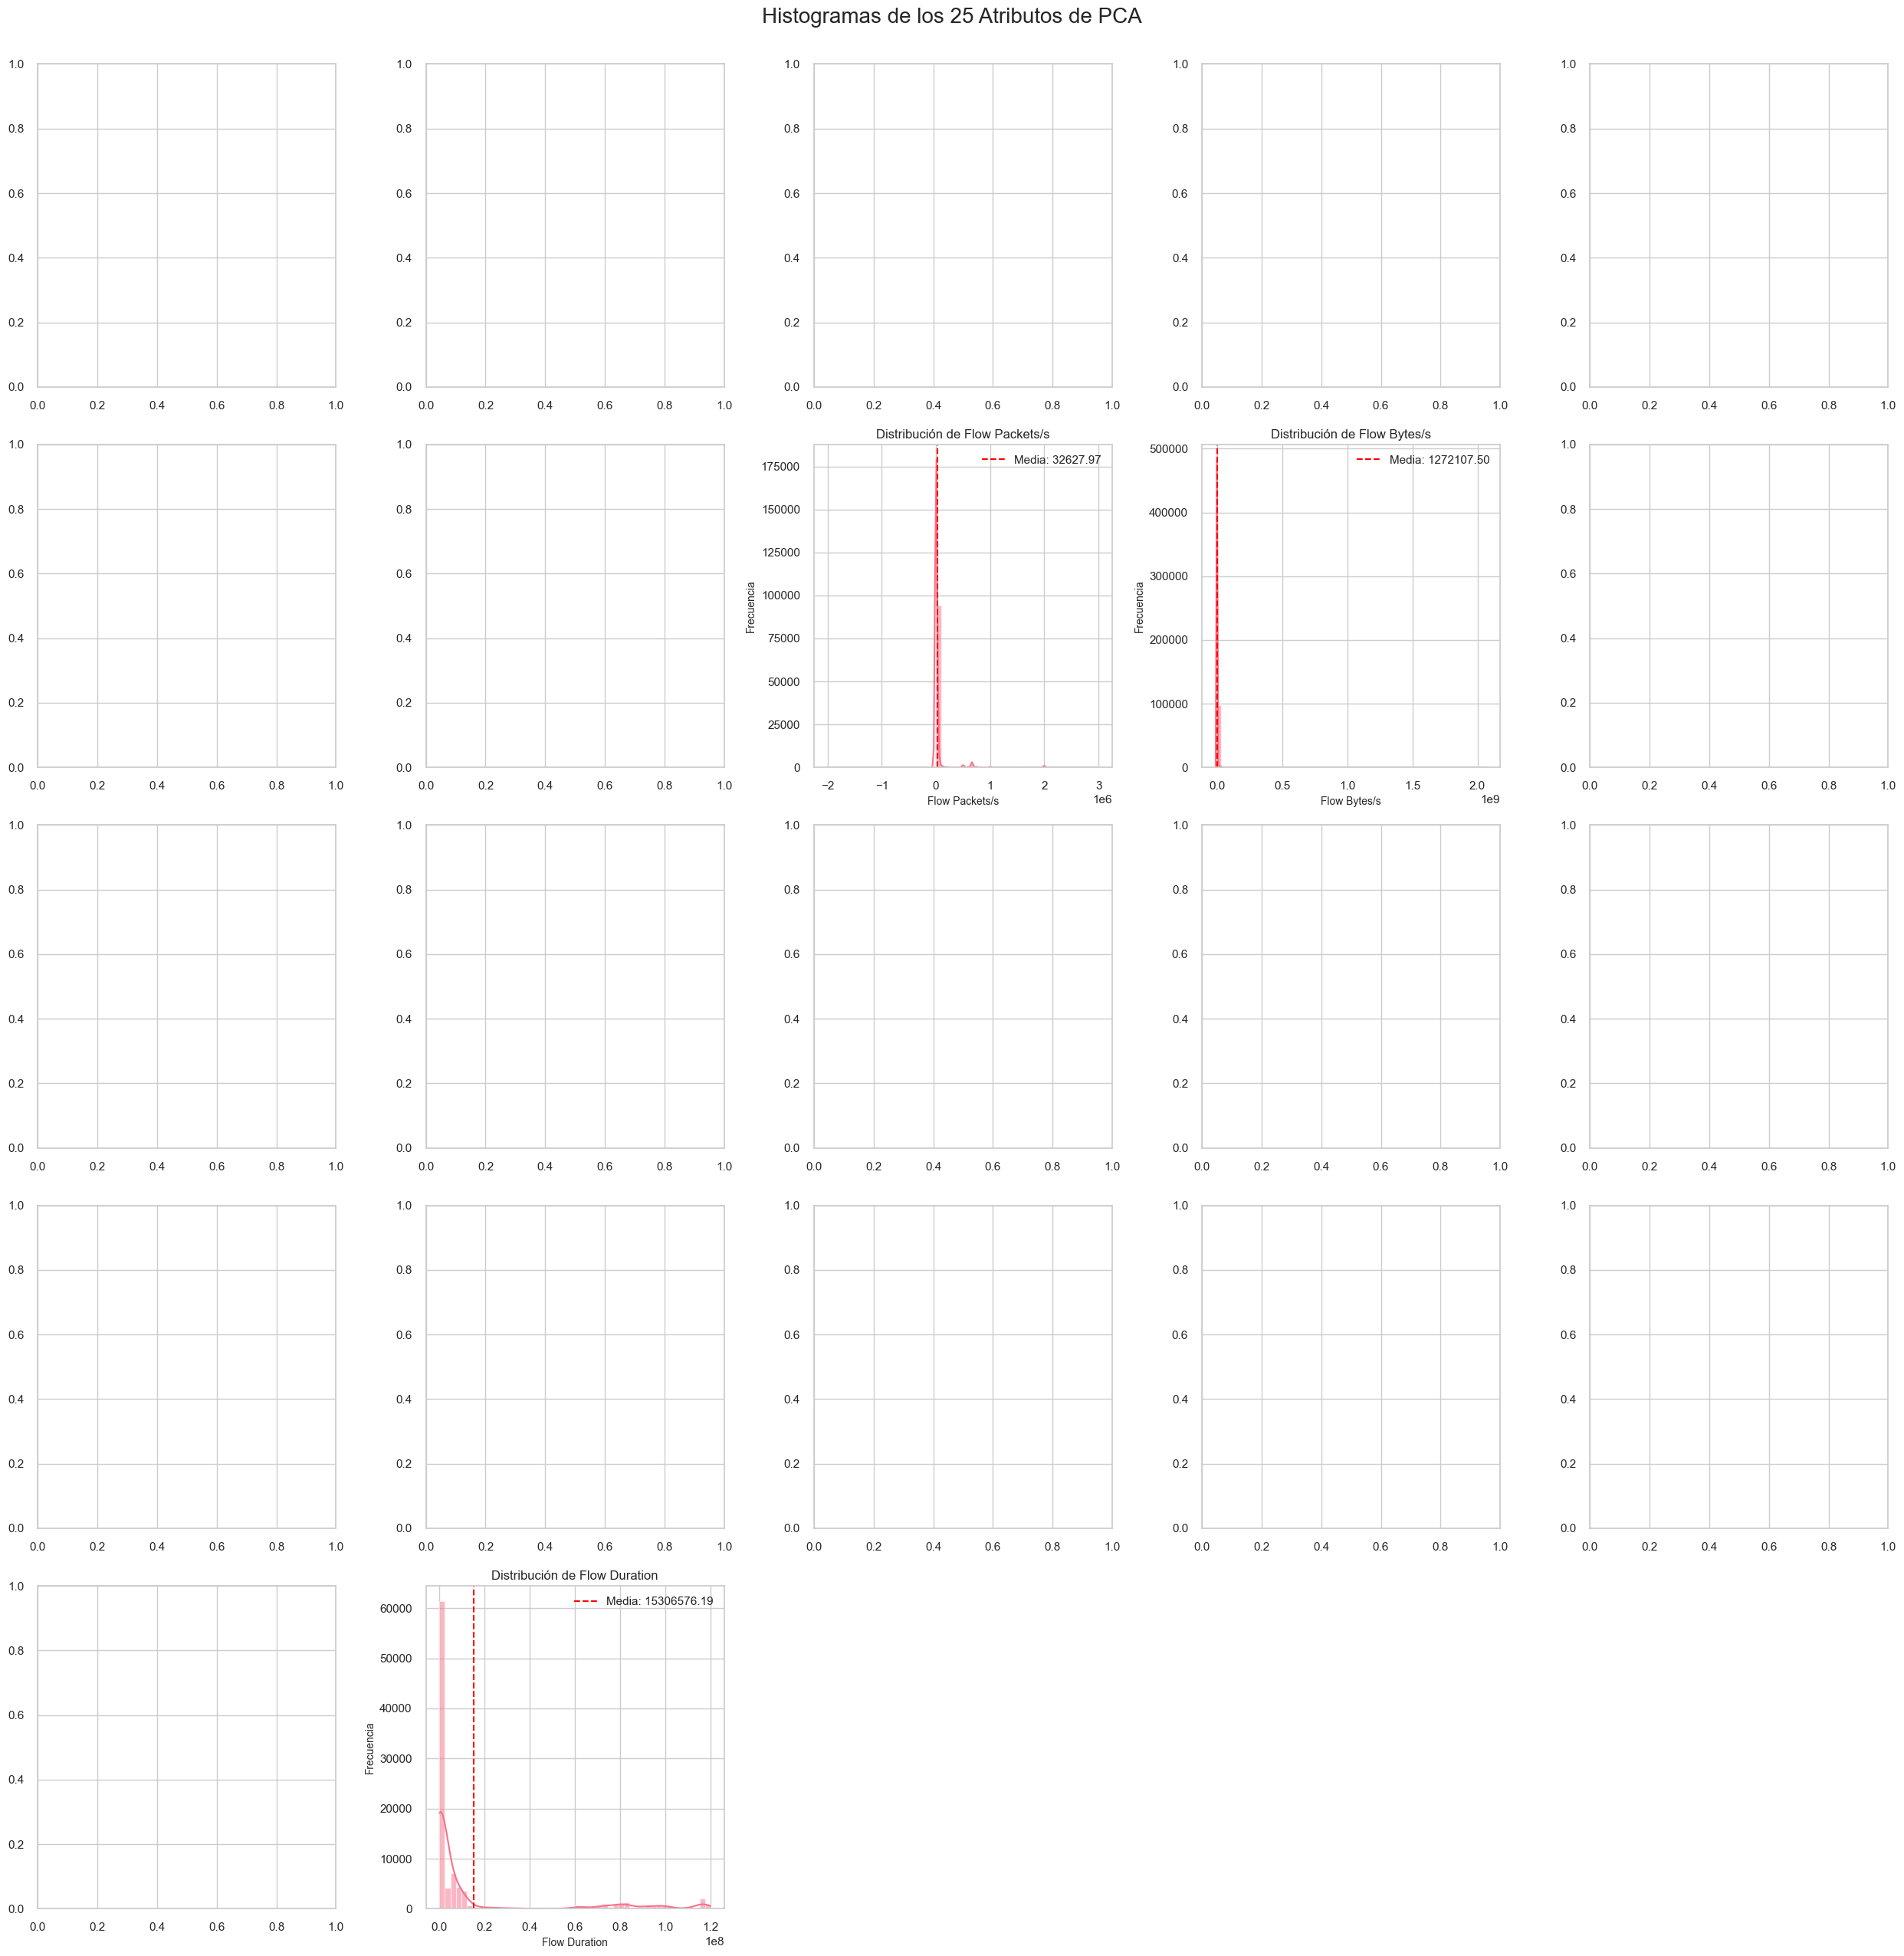


--- Histogramas para tráfico DDoS ---


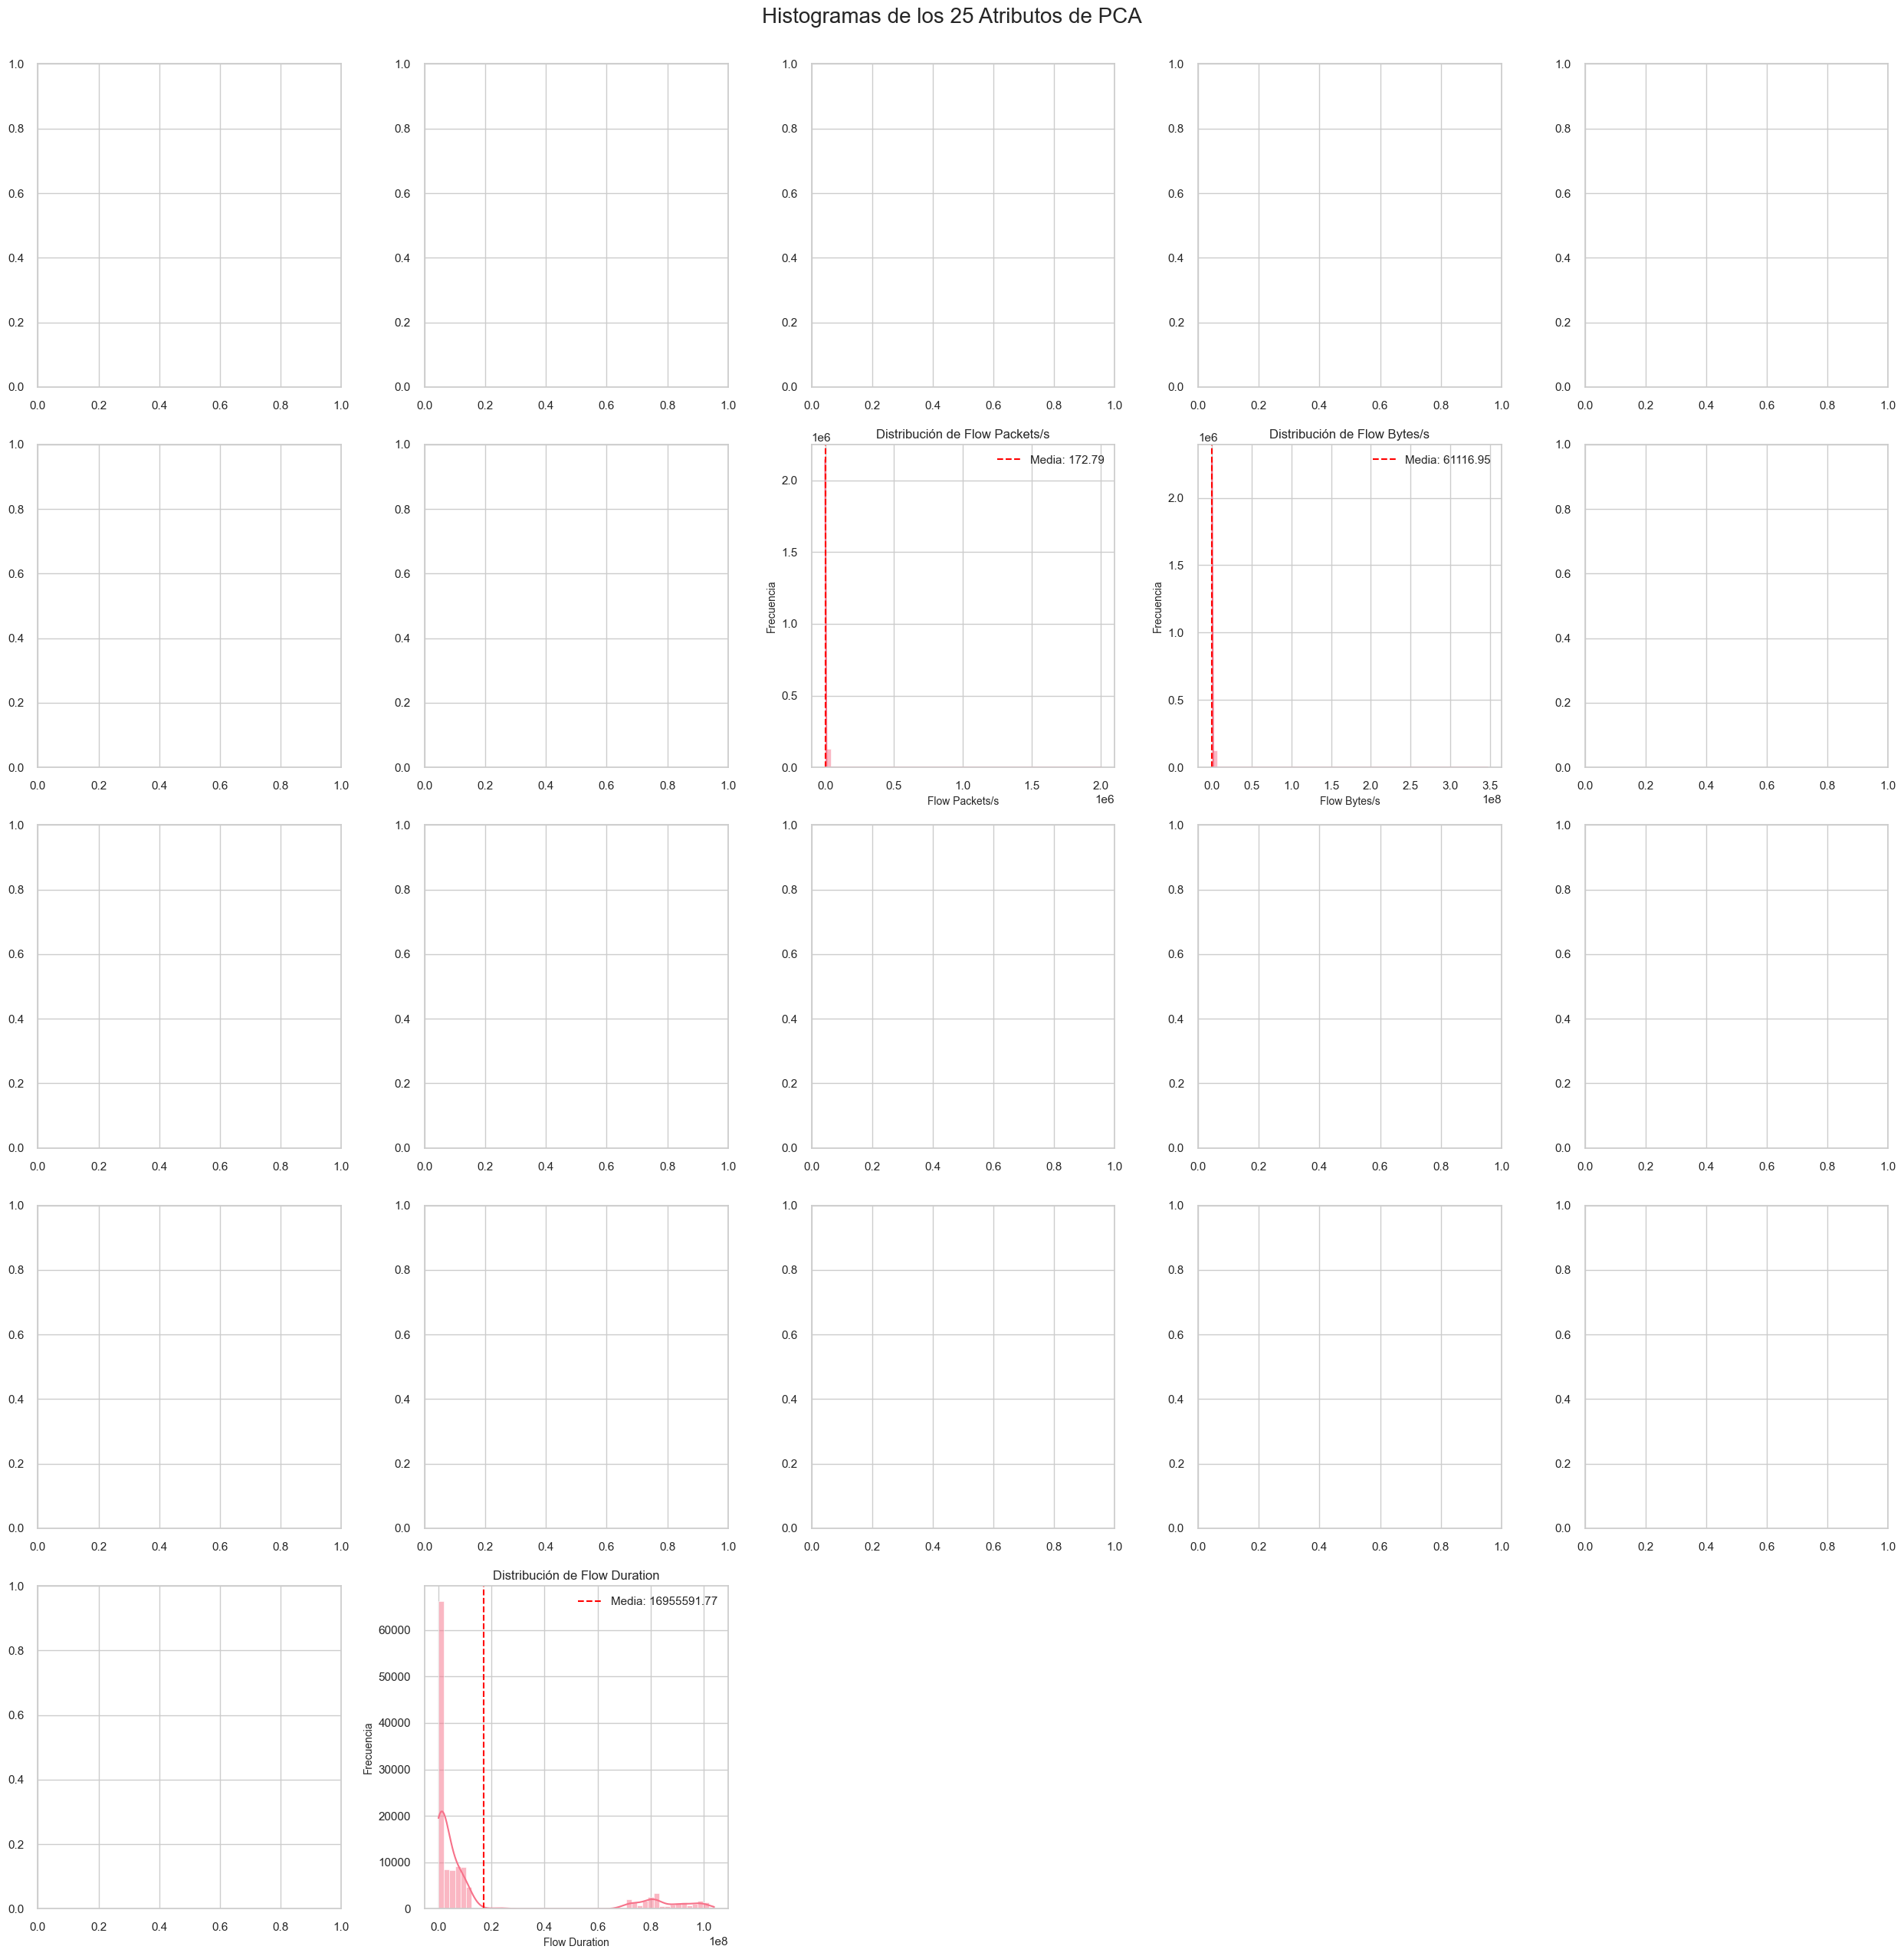


--- [FASE DE ANÁLISIS] Proceso completado exitosamente. ---


In [12]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display
from typing import List, Dict

# Se asume que las siguientes funciones han sido definidas y mejoradas
# en el mismo script o importadas desde un módulo local.
# from my_module import f_process_read_csv, f_cleaning, f_analyze_time_series, f_histogramas
# from my_module import f_explore_network_traffic_for_scanning_activity, f_explore_system_commitment_activity

def main():
    """
    Función principal para orquestar el análisis de tráfico de red en la fase
    de exploración y compromiso de ataques.
    """

    # --- 1. CONFIGURACIÓN ---
    # Rutas y atributos principales
    filename = 'C:/DataSets/Produccion/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
    MAIN_ATTRIBUTES = ['Timestamp', 'Source IP', 'Destination IP', 'Protocol',
                       'Flow Packets/s', 'Flow Bytes/s', 'Flow Duration', 'Label']

    FLAGS_LIST = ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
                  'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count']

    # Rangos de tiempo para la exploración de ataques
    SCANNING_START_TIME = '2017-07-07 03:40:00'
    SCANNING_END_TIME = '2017-07-07 04:50:00'

    COMMITMENT_START_TIME = '2017-07-07 03:40:00'
    COMMITMENT_END_TIME = '2017-07-07 04:50:00'

    print("--- [FASE DE ANÁLISIS] Inicio del proceso de exploración y compromiso ---")

    # --- 2. CARGA Y PREPROCESAMIENTO DE DATOS ---
    try:
        # **Línea corregida:** Se utiliza isinstance() para validar el tipo de dato.
        if not isinstance(filename, str) or not filename.endswith('.csv'):
            raise ValueError("El nombre de archivo debe ser una cadena y terminar con '.csv'")

        print(f"\n[1/4] Cargando y preprocesando datos desde: {filename}")
        df_raw = f_process_read_csv(filename)
        df_cleaned = f_cleaning(df_raw.copy())

        # Seleccionar las columnas principales para el análisis
        if not all(col in df_cleaned.columns for col in MAIN_ATTRIBUTES):
            missing_cols = [col for col in MAIN_ATTRIBUTES if col not in df_cleaned.columns]
            raise ValueError(f"Error: Faltan las siguientes columnas en el DataFrame: {missing_cols}")

        df_main = df_cleaned[MAIN_ATTRIBUTES]
        print("[6/4] Preprocesamiento completado. DataFrame listo para el análisis.")

    except FileNotFoundError:
        print(f"Error: El archivo {filename} no se encuentra.")
        return
    except Exception as e:
        print(f"Error durante la carga y preprocesamiento de datos: {e}")
        return

    # --- 3. EXPLORACIÓN DE ATAQUES ---
    print("\n[6/4] Iniciando análisis de la fase de exploración (Scanning)...")
    try:
        # Se asume que f_explore_network_traffic_for_scanning_activity utiliza el DataFrame completo
        # para calcular umbrales estadísticos de forma robusta.
        df_scanning_flows = f_explore_network_traffic_for_scanning_activity(
            df=df_main,
            start_time=SCANNING_START_TIME,
            end_time=SCANNING_END_TIME,
            attributes_to_display=MAIN_ATTRIBUTES
        )
    except Exception as e:
        print(f"Error durante el análisis de exploración: {e}")

    # --- 4. COMPROMISO DEL SISTEMA ---
    print("\n[6/4] Iniciando análisis de la fase de compromiso (DDoS)...")
    try:
        # Se asume que f_explore_system_commitment_activity utiliza el DataFrame completo
        df_commitment_flows = f_explore_system_commitment_activity(
            df=df_main,
            start_time=COMMITMENT_START_TIME,
            end_time=COMMITMENT_END_TIME,
            attributes_to_display=MAIN_ATTRIBUTES
        )
    except Exception as e:
        print(f"Error durante el análisis de compromiso: {e}")

    # --- 5. ANÁLISIS DE DATOS ADICIONALES (HISTOGRAMAS) ---
    print("\n[6/4] Generando histogramas para el análisis de banderas de protocolo...")
    try:
        df_benign = df_main[df_main['Label'] == 'BENIGN']
        df_ddos = df_main[df_main['Label'] == 'DDoS']

        print("\n--- Histogramas para tráfico BENIGN ---")
        f_show_histograms(df_benign)

        print("\n--- Histogramas para tráfico DDoS ---")
        f_show_histograms(df_ddos)

    except Exception as e:
        print(f"Error durante la generación de histogramas: {e}")

       
    print("\n--- [FASE DE ANÁLISIS] Proceso completado exitosamente. ---")


if __name__ == "__main__":
    main()